# Basic image I/O

In [1]:
import cv2
from matplotlib import pyplot as plt
from scipy import signal

## 1. Using openCV and Matplotlib

In [2]:
img = cv2.imread('image/police1.jpg')
print (type(img))

<class 'numpy.ndarray'>


openCV reads image as numpy n-dimension(nd)array.

In [3]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

You need to convert BRG to RGB
Matplotlib expects image in RGB format but OpenCV provides it in BGR.

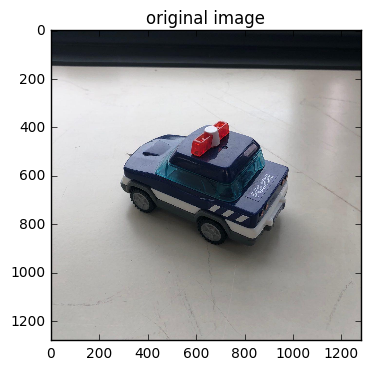

In [4]:
plt.imshow(RGB_img)
plt.title('original image')
plt.show()

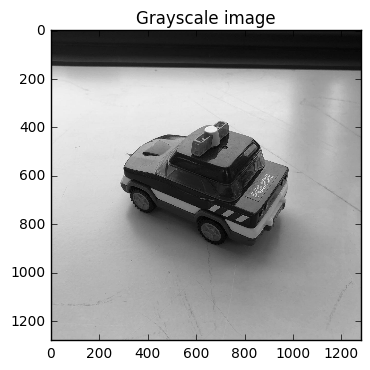

In [5]:
plt.imshow(GRAY_img, cmap='gray')
plt.title('Grayscale image')
plt.show()

Here ! You can see the image above!

# 2. Basic Gaussian Convolution Filter

In this example you can make the basic 3x3 gaussian convolution filter

In [6]:
import numpy as np

In [7]:
filter_img = cv2.imread('image/filter_example.tif')
GRAY_img = cv2.cvtColor(filter_img, cv2.COLOR_BGR2GRAY)


In [8]:
conv_filter = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
print(conv_filter)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


We are going to use this 3x3 filter.

### First, we use grayscale image for simplicity.

In [9]:
convolved_image = signal.convolve2d(GRAY_img, conv_filter, mode='same')

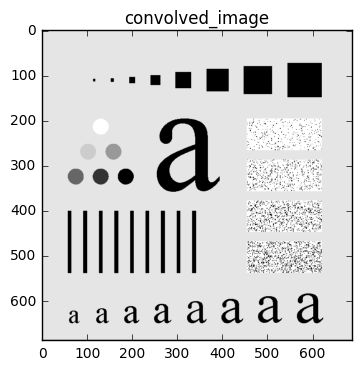

In [10]:
plt.imshow(convolved_image, cmap='gray')
plt.title('convolved_image')
plt.show()

Hmm... it seems that it doesn't change any...  
Let's try 5x5 Gaussian filter (blur).

In [11]:
conv_filter2 = np.array([[1/256, 4/256, 6/256, 4/256, 1/256],[4/256, 16/256, 24/256, 16/256, 4/256],[6/256, 24/256, 36/256, 24/256, 6/256],[4/256, 16/256, 24/256, 16/256, 4/256],[1/256, 4/256, 6/256, 4/256, 1/256]])
print(conv_filter2)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


Sorry for long code...

In [12]:
convolved_image2 = signal.convolve2d(GRAY_img, conv_filter2, mode='same')

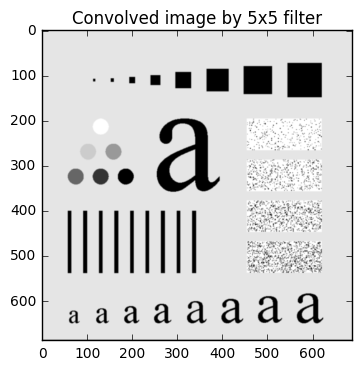

In [13]:
plt.imshow(convolved_image2,  cmap='gray')
plt.title('Convolved image by 5x5 filter')
plt.show()

In [14]:
difference_image = convolved_image - GRAY_img

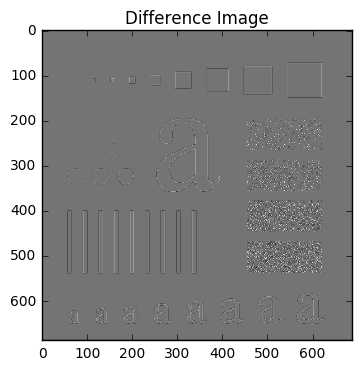

In [15]:
plt.imshow(difference_image, cmap='gray')
plt.title('Difference Image')
plt.show()

Now it can be seen the 'diffence' well.

# 3. Laplacian of Gaussian


$$
L(x,y)=\nabla^{2}{f(x,y)} = \frac{\partial^{2}{f(x,y)}}{\partial{x^{2}}} + \frac{\partial^{2}{f(x,y)}}{\partial{y^{2}}}
$$

Basic 3x3 Laplacian filter is look like this.  
$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 
\end{bmatrix}
$$

In [16]:
laplacian_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
print(laplacian_filter)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


In [17]:
laplacian_image = signal.convolve2d(GRAY_img, laplacian_filter, mode='same')

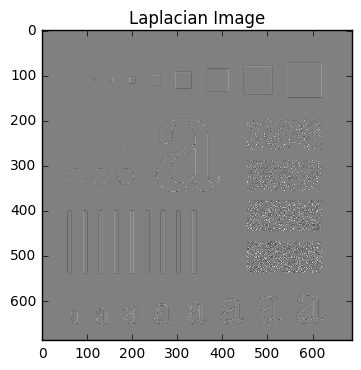

In [18]:
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Image')
plt.show()

You can see the EDGE of the image.

# 4. Difference of Gaussian (DoG)

In [19]:
import matplotlib.mlab as mlab

With first $\sigma_{1} = 1$ you can get the gaussian PDF like below

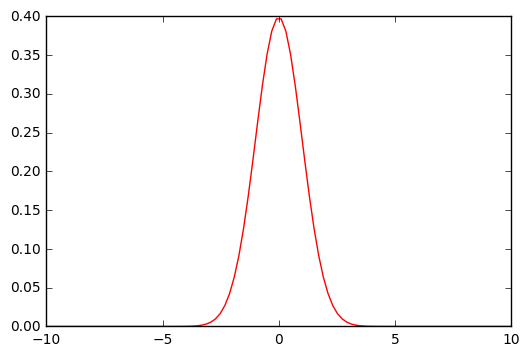

In [20]:
average = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace (average -10 * sigma, average + 10* sigma, 100)
plt.plot(x,mlab.normpdf(x,average, sigma), 'r')
plt.show()

with second $\sigma_{2} = 2$

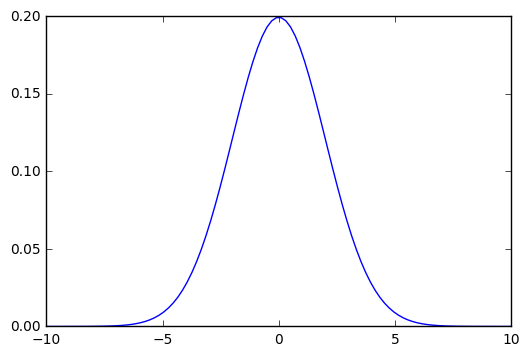

In [21]:
sigma2 = 2
plt.plot(x,mlab.normpdf(x, average, sigma2))
plt.show()

Let's draw both graph together

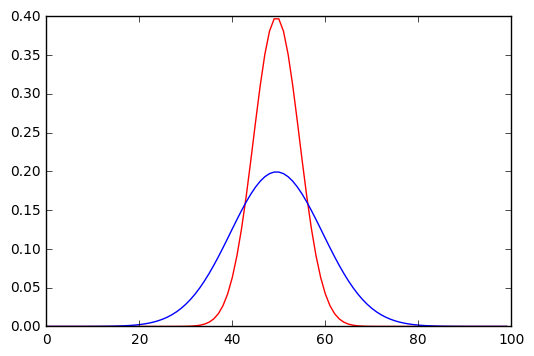

In [22]:
gaussian_1 = mlab.normpdf(x, average, sigma)
gaussian_2 = mlab.normpdf(x, average, sigma2)
plt.plot(gaussian_1, 'r', gaussian_2, 'b')
plt.show()

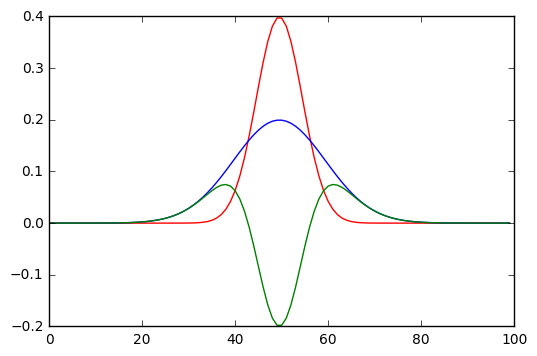

In [23]:
diff_gaussian = gaussian_2 - gaussian_1
plt.plot(gaussian_1, 'r', gaussian_2, 'b', diff_gaussian, 'g')
plt.show()

5x5 Gaussian filter with sigma 1
$$
\begin{bmatrix}
0.003765 & 0.015019 & 0.023792 & 0.015019 & 0.003765 \\
0.015019 & 0.059912 & 0.094907 & 0.059912 & 0.015019 \\
0.023792 & 0.094907 & 0.150342 & 0.094907 & 0.023792 \\
0.015019 & 0.059912 & 0.094907 & 0.059912 & 0.015019 \\
0.003765 & 0.015019 & 0.023792 & 0.015019 & 0.003765 
\end{bmatrix}
$$

5x5 Gaussian filter with sigma 2 is :
$$
\begin{bmatrix}
0.023528 & 0.033969 & 0.038393 & 0.033969 & 0.023528 \\ 
0.033969 & 0.049045 &0.055432 & 0.049045 & 0.033969 \\
0.038393 & 0.055432 & 0.062651 & 0.055432 & 0.038393 \\
0.033969 & 0.049045 & 0.055432 & 0.049045 & 0.033969 \\
0.023528 & 0.033969 & 0.038393 & 0.033969 & 0.023528 
\end{bmatrix}
$$

to simply we gonna use scipy library  
we use dirac delta function to get gaussian kernel value

In [25]:
from scipy.ndimage import filters

In [26]:
def gkern2d(size, sig):
    input = np.zeros((size, size))
    input[size//2, size//2] = 1
    return filters.gaussian_filter(input, sig)

In [27]:
gaussian_1 = gkern2d(5, 1)
print(gaussian_1)

[[0.00341325 0.01414451 0.02330747 0.01414451 0.00341325]
 [0.01414451 0.05861496 0.09658632 0.05861496 0.01414451]
 [0.02330747 0.09658632 0.15915589 0.09658632 0.02330747]
 [0.01414451 0.05861496 0.09658632 0.05861496 0.01414451]
 [0.00341325 0.01414451 0.02330747 0.01414451 0.00341325]]


In [28]:
gaussian_2 = gkern2d(5, 2)
print(gaussian_2)

[[0.03468932 0.03822752 0.04041701 0.03822752 0.03468932]
 [0.03822752 0.04212661 0.04453941 0.04212661 0.03822752]
 [0.04041701 0.04453941 0.04709041 0.04453941 0.04041701]
 [0.03822752 0.04212661 0.04453941 0.04212661 0.03822752]
 [0.03468932 0.03822752 0.04041701 0.03822752 0.03468932]]


Then finally, we can define the Difference of Gaussian function as below : 

In [29]:
def dog(size, sigma1, sigma2):
    gauss1 = gkern2d(size, sigma1)
    gauss2 = gkern2d(size, sigma2)
    return gauss1 - gauss2

In [30]:
dog(5, 1, 2)

array([[-0.03127607, -0.02408301, -0.01710954, -0.02408301, -0.03127607],
       [-0.02408301,  0.01648835,  0.0520469 ,  0.01648835, -0.02408301],
       [-0.01710954,  0.0520469 ,  0.11206548,  0.0520469 , -0.01710954],
       [-0.02408301,  0.01648835,  0.0520469 ,  0.01648835, -0.02408301],
       [-0.03127607, -0.02408301, -0.01710954, -0.02408301, -0.03127607]])

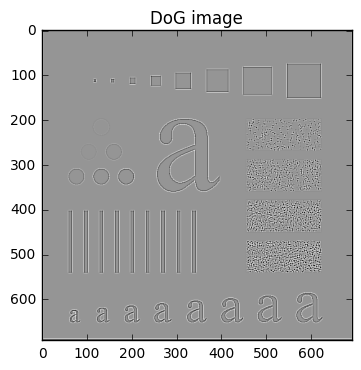

In [31]:
dog_image = signal.convolve2d(GRAY_img, dog(5,1,2))
plt.imshow(dog_image, cmap='gray')
plt.title('DoG image')
plt.show()

Now you can see the strong EDGE by DoG filter.

### DoG as a Band Pass Filter
Difference of Gaussian filter act like band pass filter. It rejects high frequency which means noise of the image. It also rejects low frequency which means the homogeneous area. Since this filter passes only edge-like feature, it works as an Edge detector.  

# 5. SIFT
## 5.1 Scale-space Extrema Detection
It is obvious that we can't use the smae window to detect keypoints with different scale. It is OK with small corner. But to detect larger corners we need larger windows. For this scale-space filtering is used. LoG acts as a blob detector which detects blobs in various sizes due to change in $\sigma$. In short, $\sigma$ acts as a scaling parameter. Low $\sigma$ gives high value for small corner, high $\sigma$ fits well for larger corner. So we can find the local maxima across the scale and space which gives us a list of $(x,y,\sigma)$ values which means there is a potential keypoint at $(x,y)$ at $\sigma$ scale.

But this LoG is a little costly, so SIFT algorithm uses Difference of Gaussians that we have been calulated;an approximation of LoG. Difference of Gaussian is obtained as the difference of Gaussian bllurring of an image with two different $\sigma$, let it be $\sigma$ and $k\sigma$. This process is done for different octaves of the image in Gaussian Pyramid.

Once this DoG are found, images are searched for local extrema over scale and space. For eg, one pixel in an image is compared with its 8 neighbours as well as 9 pixels in next scale and 9 pixels in previous scales. If it is a local extrema, it is a potential keypoint. It basically means that keypoint is best represented in that scale. 

Regarding different parameters, the paper gives some empirical data which can be summarized as, number of octaves = 4, number of scale levels = 5, initial $\sigma=1.6, k=\sqrt{2}$ etc as optimal values.

### 5.1.1 Scale spaces example

In [32]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

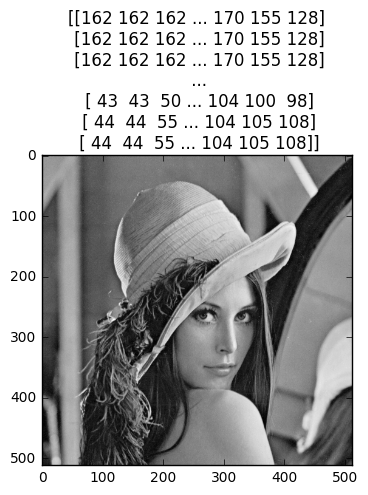

In [33]:
plt.imshow(lena, cmap='gray')
plt.title(lena)
plt.show()

In [141]:
def gaussian_blur(input, size, sigma):
    return signal.convolve2d(input, gkern2d(size, sigma), mode='same')

now let $\sigma$ is like this :
$$
\begin{bmatrix}
0.707107 & 1.000000 & 1.414214 & 2.000000 & 2.828427 \\
1.414214 & 2.000000 & 2.828427 & 4.000000 & 5.656854 \\
2.828427 & 4.000000 & 5.656854 & 8.000000 & 11.313708 \\
5.656854 & 8.000000 & 11.313708 & 16.000000 & 22.627417 \\
\end{bmatrix}
$$

In [153]:
sigma = np.array([[0.707107 , 1.000000 , 1.414214 , 2.000000 , 2.828427],
[1.414214 , 2.000000 , 2.828427 , 4.000000 , 5.656854],
[2.828427 , 4.000000 , 5.656854 , 8.000000 , 11.313708],
[5.656854 , 8.000000 , 11.313708 , 16.000000 , 22.627417]])
#print(sigma)

for i in range(4):
    print(sigma[i,:])

[0.707107 1.       1.414214 2.       2.828427]
[1.414214 2.       2.828427 4.       5.656854]
[ 2.828427  4.        5.656854  8.       11.313708]
[ 5.656854  8.       11.313708 16.       22.627417]


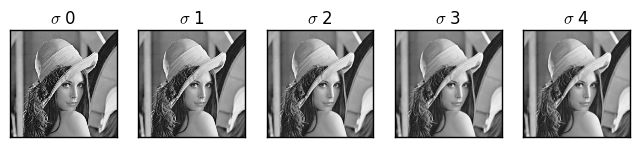

In [155]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

fig=plt.figure(figsize=(8,8))
columns = 5
rows = 1

for i in range (columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.xticks(())
    plt.yticks(())
    plt.imshow(gaussian_blur(lena, 5, sigma[0,i]), cmap='gray')
    plt.title('$\sigma$ '+str(i))
plt.show()

### 5.1.2 Scale spaces in SIFT

SIFT takes scale spaces to the next level. You take the original image, and generate progressively blurred out images. Then, you resize the original image to half size. And you generate blurred out images again. ...

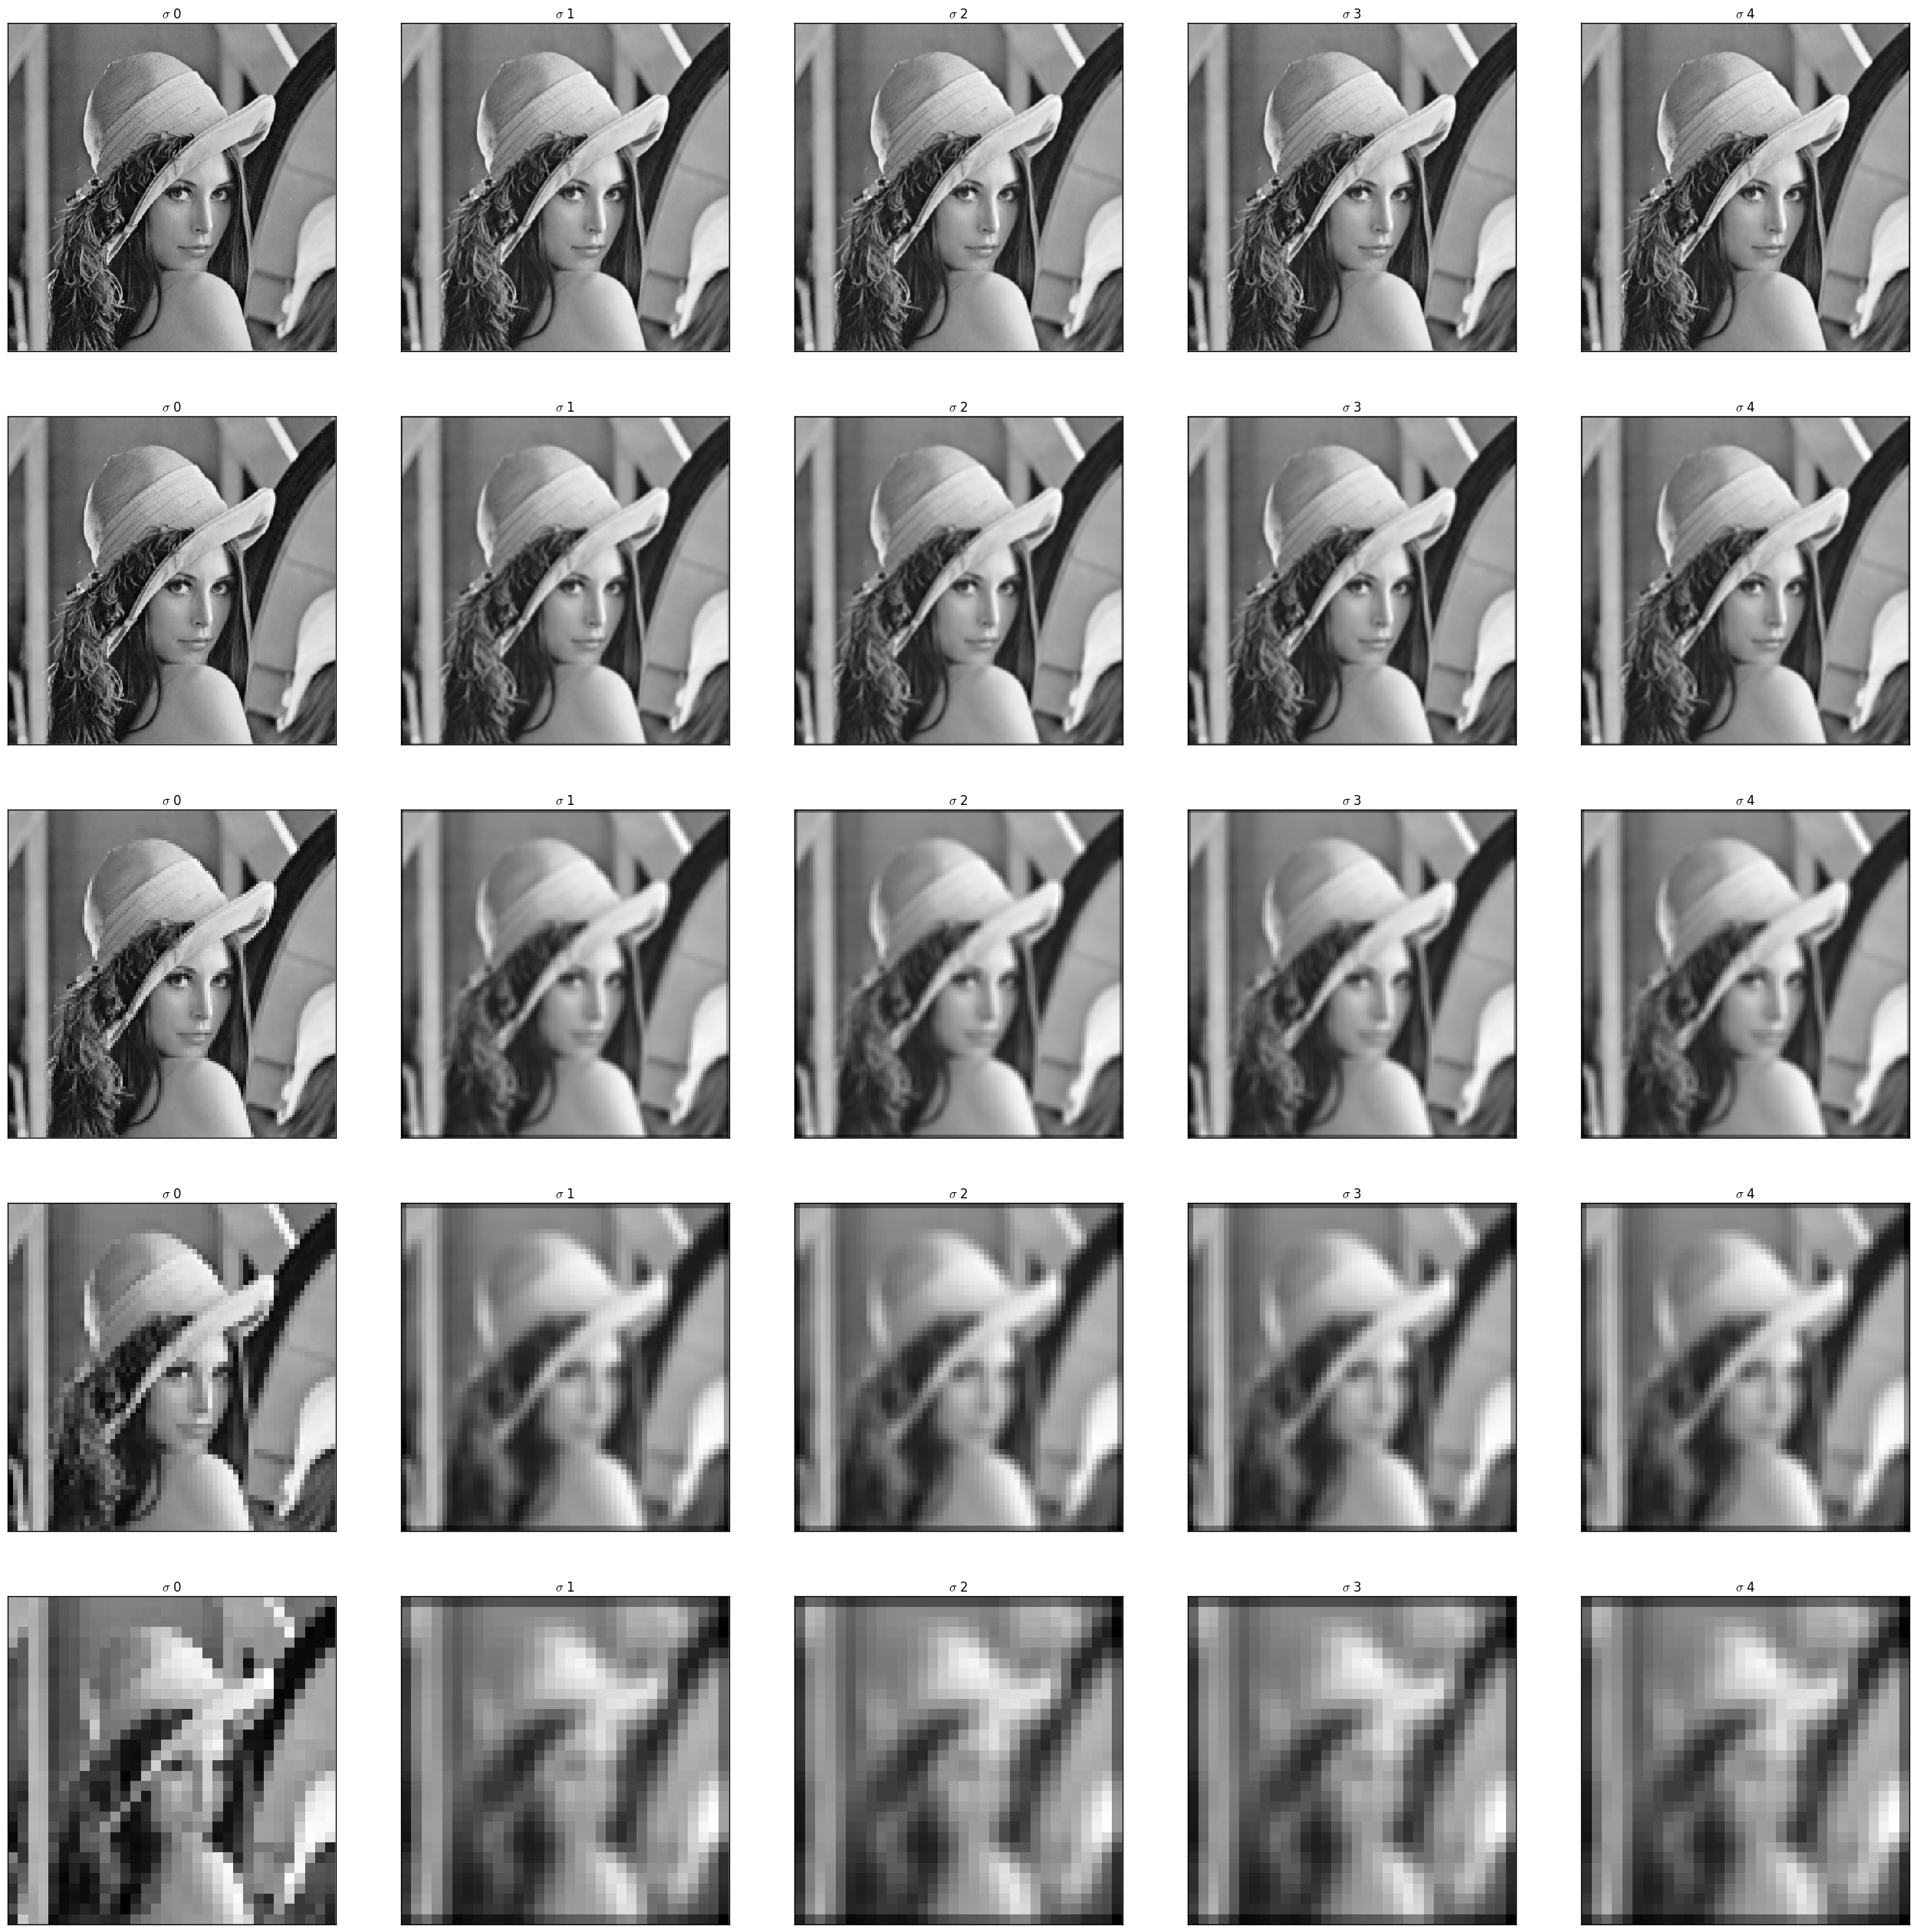

In [172]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=(32,32))
columns = 5
rows = 5

for i in range (0, columns*rows):
    plt.subplot(rows, columns, i+1)
    plt.xticks(())
    plt.yticks(())
    #plt.axis([0,512, 512,0])

    plt.imshow(gaussian_blur(lena, 3, i%5), cmap='gray', interpolation='none', aspect='equal')
    
    plt.title('$\sigma$ '+str(i%5))
    if i%5 == 4:
        lena = cv2.resize(lena, (0,0), fx=0.5, fy=0.5)


plt.show()


### 5.1.3 The technical details

#### Octaves and Scales

The creator of SIFT suggests that 4 octaves and 5 blur levels are ideal for the algorithm

#### The first otave

If the original image is doubled in size and antialiased a bit (by blurring it) then the algorithm produces more four times more keypoints. The more the keypointsm the better!

## 5.2 LoG approximations

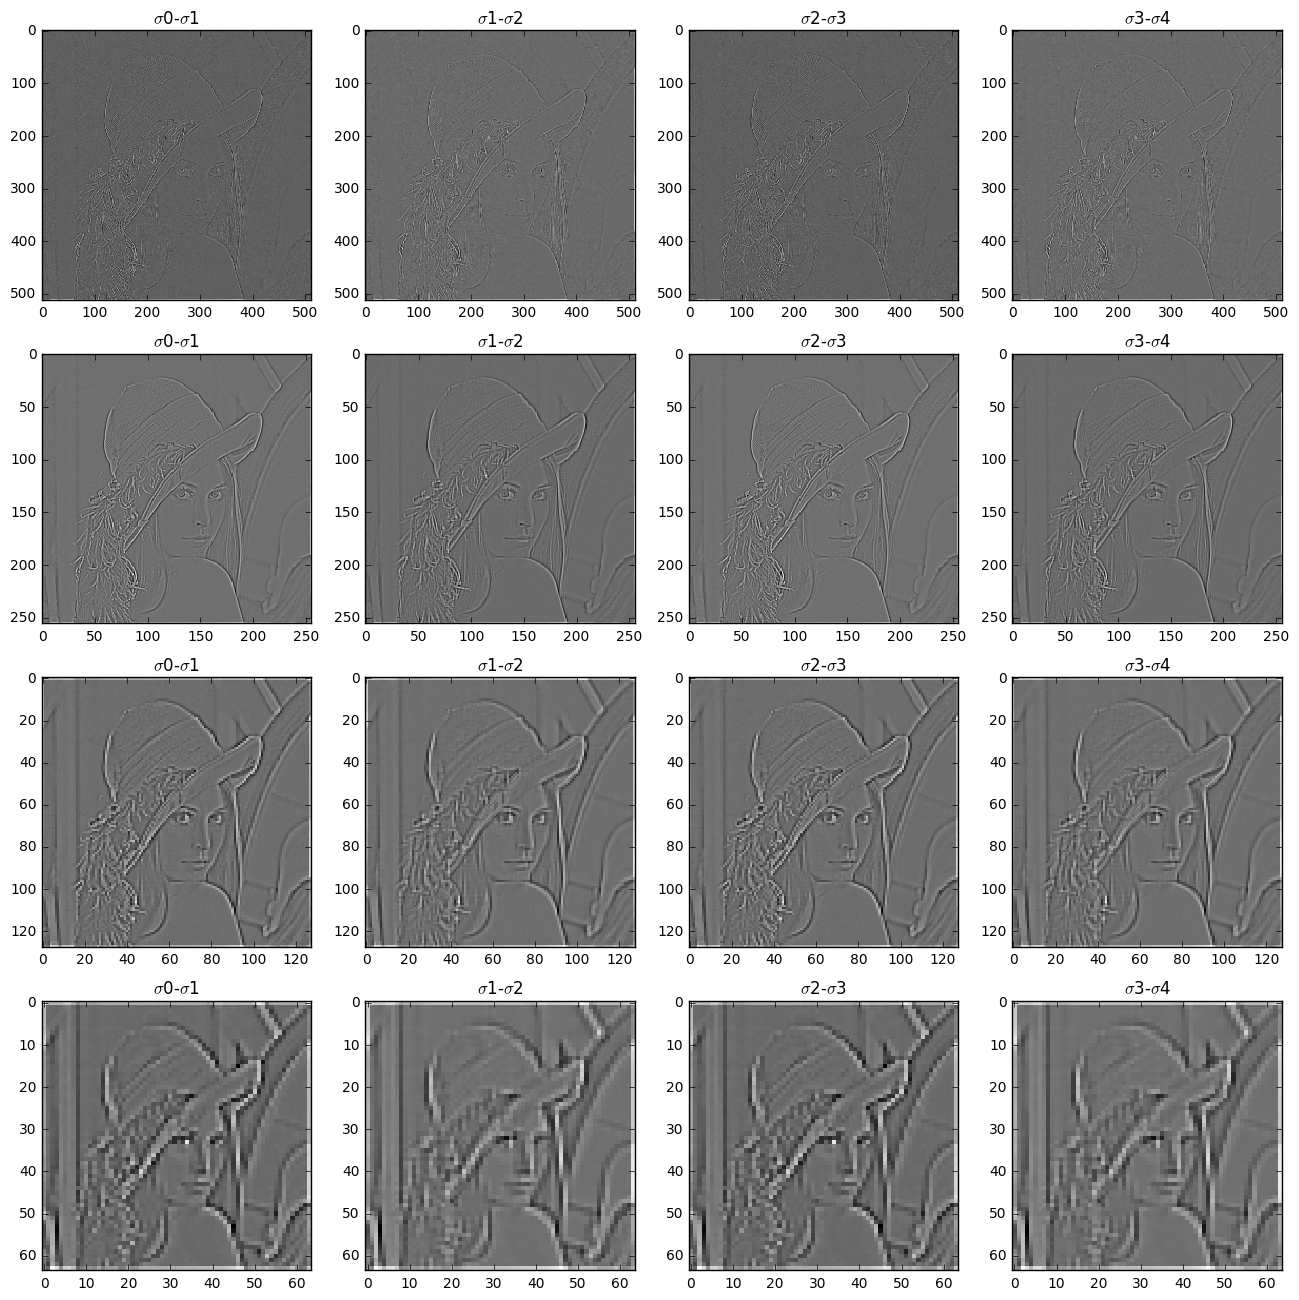

In [196]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

columns = 4
rows = 4
fig=plt.figure(figsize=(16,16))

for i in range (0, columns*rows):
    plt.subplot(rows, columns, i+1)
    #plt.xticks(())
    #plt.yticks(())
    #plt.axis([0,512, 512,0])

    
    difference = gaussian_blur(lena, 3, 2*i%4) - gaussian_blur(lena, 3, 2*i%4+1)

    plt.imshow(difference, cmap='gray', interpolation='none', aspect='equal')
    
    plt.title('$\sigma$'+str(i%4)+'-'+'$\sigma$'+str(i%4+1))
    if i%4 == 3:
        lena = cv2.resize(lena, (0,0), fx=0.5, fy=0.5)



plt.show()

## 5.3 Finding keypoints

Finding key points is a two part process
    1. Locate maxima/minima in DoG images
    2. Find subpixel maxima/minima

### 5.3.1 Locate maxima/minima in DoG images

The first step is to coarsely locate the maxima and minima.
X is marked as a "key point" if it is the greatest or least of all 26 neighbors.  
Let's do this with first octave and first three diffence images.

In [197]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

diff1_0 = gaussian_blur(lena, 3, sigma[0,0]) - gaussian_blur(lena, 3, sigma[0,1])
diff2_1 = gaussian_blur(lena, 3, sigma[0,1]) - gaussian_blur(lena, 3, sigma[0,2])
diff3_2 = gaussian_blur(lena, 3, sigma[0,2]) - gaussian_blur(lena, 3, sigma[0,3])
diff4_3 = gaussian_blur(lena, 3, sigma[0,3]) - gaussian_blur(lena, 3, sigma[0,4])

key0 = np.zeros((512,512))
key1 = np.zeros((512,512))

num_key0 = 0

for y in range (1,512-1):
    for x in range (1,512-1):
        current = diff2_1[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff1_0[x+i,y+j] <= current:
                    count += 1
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            key0[x,y] = current
            num_key0 += 1
        else :
            key0[x,y] = 0                   
                                
print('The number of key is : '+str(num_key0))


The number of key is : 65


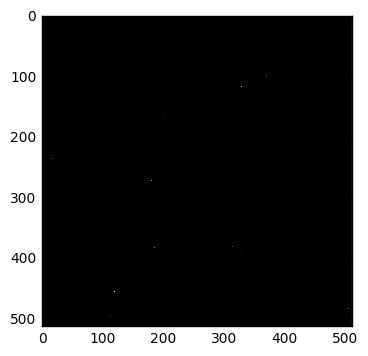

In [198]:
plt.imshow(key0, cmap='gray', interpolation='none', aspect='equal')
plt.show()

Keypoint at second three images is like :

In [199]:
num_key1 = 0
for y in range (1,512-1):
    for x in range (1,512-1):
        current = diff3_2[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+j] <= current:
                    count += 1
                if diff4_3[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            key1[x,y] = current
            num_key1 += 1
        else :
            key1[x,y] = 0
print('The number of key is : '+str(num_key1))

The number of key is : 16


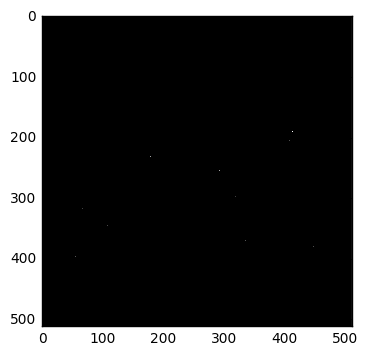

In [200]:
plt.imshow(key1, cmap='gray', interpolation='none', aspect='equal')
plt.show()

Like this we can calculate keypoints at the other octaves.

In [205]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

lena = cv2.resize(lena, (0,0), fx=0.5, fy=0.5)

diff1_0 = gaussian_blur(lena, 3, sigma[1,0]) - gaussian_blur(lena, 3, sigma[1,1])
diff2_1 = gaussian_blur(lena, 3, sigma[1,1]) - gaussian_blur(lena, 3, sigma[1,2])
diff3_2 = gaussian_blur(lena, 3, sigma[1,2]) - gaussian_blur(lena, 3, sigma[1,3])
diff4_3 = gaussian_blur(lena, 3, sigma[1,3]) - gaussian_blur(lena, 3, sigma[1,4])

octave1_key0 = np.zeros((256,256))
octave1_key1 = np.zeros((256,256))

num_key0 = 0

for y in range (1,256-1):
    for x in range (1,256-1):
        current = diff2_1[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff1_0[x+i,y+j] <= current:
                    count += 1
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            octave1_key0[x,y] = current
            num_key0 += 1
        else :
            octave1_key0[x,y] = 0      
            
print('The number of key is : '+str(num_key0))

num_key1 = 0
for y in range (1,256-1):
    for x in range (1,256-1):
        current = diff3_2[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+j] <= current:
                    count += 1
                if diff4_3[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            octave1_key1[x,y] = current
            num_key1 += 1
        else :
            octave1_key1[x,y] = 0

print('The number of key is : '+str(num_key1))

The number of key is : 0
The number of key is : 309


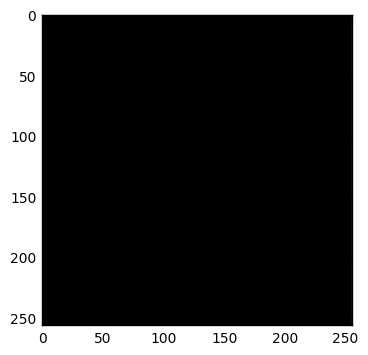

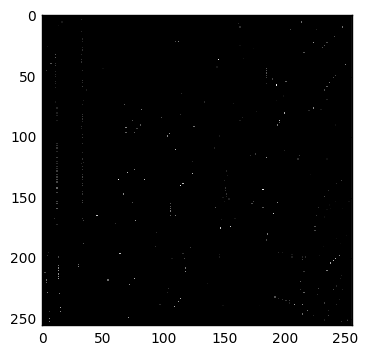

In [202]:
plt.imshow(octave1_key0, cmap='gray', interpolation='none', aspect='equal')
plt.show()
plt.imshow(octave1_key1, cmap='gray', interpolation='none', aspect='equal')
plt.show()

The number of key is : 244
The number of key is : 0


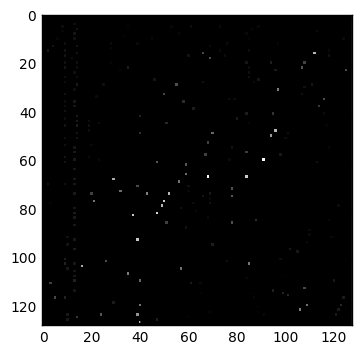

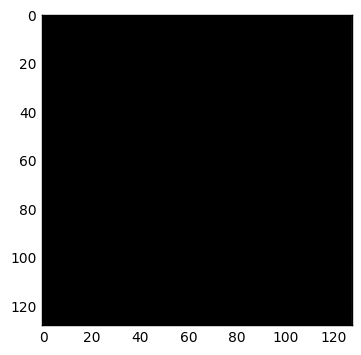

In [207]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

lena = cv2.resize(lena, (0,0), fx=0.25, fy=0.25)

diff1_0 = gaussian_blur(lena, 3, sigma[2,0]) - gaussian_blur(lena, 3, sigma[2,1])
diff2_1 = gaussian_blur(lena, 3, sigma[2,1]) - gaussian_blur(lena, 3, sigma[2,2])
diff3_2 = gaussian_blur(lena, 3, sigma[2,2]) - gaussian_blur(lena, 3, sigma[2,3])
diff4_3 = gaussian_blur(lena, 3, sigma[2,3]) - gaussian_blur(lena, 3, sigma[2,4])

octave2_key0 = np.zeros((128,128))
octave2_key1 = np.zeros((128,128))

num_key0 = 0

for y in range (1,128-1):
    for x in range (1,128-1):
        current = diff2_1[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff1_0[x+i,y+j] <= current:
                    count += 1
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            octave2_key0[x,y] = current
            num_key0 += 1
        else :
            octave2_key0[x,y] = 0      
            
print('The number of key is : '+str(num_key0))

num_key1 = 0
for y in range (1,128-1):
    for x in range (1,128-1):
        current = diff3_2[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+j] <= current:
                    count += 1
                if diff4_3[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            octave2_key1[x,y] = current
            num_key1 += 1
        else :
            octave2_key1[x,y] = 0

print('The number of key is : '+str(num_key1))

plt.imshow(octave2_key0, cmap='gray', interpolation='none', aspect='equal')
plt.show()
plt.imshow(octave2_key1, cmap='gray', interpolation='none', aspect='equal')
plt.show()

The number of key is : 78
The number of key is : 0


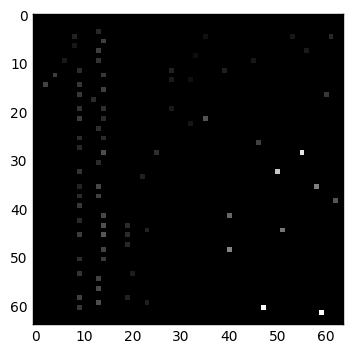

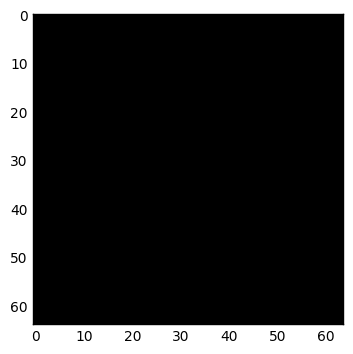

In [208]:
lena = cv2.imread('image/Lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

lena = cv2.resize(lena, (0,0), fx=0.25, fy=0.25)

diff1_0 = gaussian_blur(lena, 3, sigma[2,0]) - gaussian_blur(lena, 3, sigma[2,1])
diff2_1 = gaussian_blur(lena, 3, sigma[2,1]) - gaussian_blur(lena, 3, sigma[2,2])
diff3_2 = gaussian_blur(lena, 3, sigma[2,2]) - gaussian_blur(lena, 3, sigma[2,3])
diff4_3 = gaussian_blur(lena, 3, sigma[2,3]) - gaussian_blur(lena, 3, sigma[2,4])

octave3_key0 = np.zeros((64,64))
octave3_key1 = np.zeros((64,64))

num_key0 = 0

for y in range (1,64-1):
    for x in range (1,64-1):
        current = diff2_1[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff1_0[x+i,y+j] <= current:
                    count += 1
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            octave3_key0[x,y] = current
            num_key0 += 1
        else :
            octave3_key0[x,y] = 0      
            
print('The number of key is : '+str(num_key0))

num_key1 = 0
for y in range (1,64-1):
    for x in range (1,64-1):
        current = diff3_2[x,y]
        count = 0
        for j in range (-1,2):
            for i in range (-1,2):
                if diff2_1[x+i,y+j] <= current:
                    count += 1
                if diff3_2[x+i,y+j] <= current:
                    count += 1
                if diff4_3[x+i,y+i] <= current:
                    count += 1
        if count > 26:
            octave3_key1[x,y] = current
            num_key1 += 1
        else :
            octave3_key1[x,y] = 0

print('The number of key is : '+str(num_key1))

plt.imshow(octave3_key0, cmap='gray', interpolation='none', aspect='equal')
plt.show()
plt.imshow(octave3_key1, cmap='gray', interpolation='none', aspect='equal')
plt.show()